# Data Exploration 
Here, we'll try to compare 3 classes of images and maybe try some important features. We will use only images from the training set!

### imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import glob
%matplotlib inline


## 1. Number of images

In [14]:
num_of_normal = len(glob.glob("../data/train/NORMAL/*"))
num_of_covid = len(glob.glob("../data/train/COVID19/*"))
num_of_pneumonia = len(glob.glob("../data/train/PNEUMONIA/*"))

print("Normal: ", num_of_normal)
print("Covid-19: ", num_of_covid)
print("Pneumonia: ", num_of_pneumonia)


Normal:  1266
Covid-19:  460
Pneumonia:  3418


## 2. Raw Comparison
Let's see how random images look

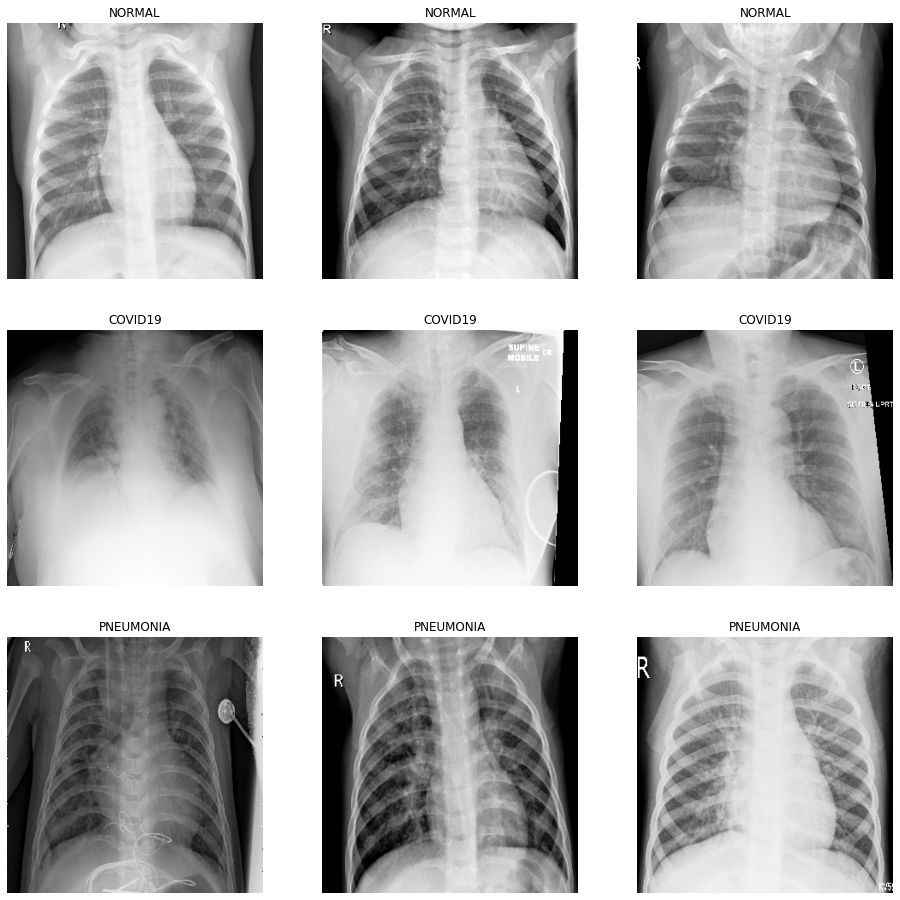

In [49]:
# pick 3 images from each class
normal = np.random.choice(glob.glob("../data/train/NORMAL/*"), 3, replace=False)
covid = np.random.choice(glob.glob("../data/train/COVID19/*"), 3, replace=False)
pneumonia = np.random.choice(glob.glob("../data/train/PNEUMONIA/*"), 3, replace=False)

# plot 
fig = plt.figure(figsize=(16, 16))
for i in range(9):
    if i < 3: 
        path = normal[i]
        label = 'NORMAL'
    elif i < 6: 
        path = covid[i-3]
        label = 'COVID19'
    else: 
        path = pneumonia[i-6]
        label ='PNEUMONIA'
    
    ax = fig.add_subplot(3, 3, i+1)
    img = image.load_img(path, target_size=(300, 300), color_mode='grayscale')
    plt.imshow(img, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')

# plt.savefig('../img/exp_comp.png', facecolor='w', bbox_inches='tight')
plt.show()


## 3. Average Image

In [20]:
IMG_SIZE = 200

normal = glob.glob("../data/train/NORMAL/*")
covid = glob.glob("../data/train/COVID19/*")
pneumonia = glob.glob("../data/train/PNEUMONIA/*")

img_array = []
for path in normal:
    img = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
    img_array.append(image.img_to_array(img))
img_array = np.array(img_array)
mean_img = np.mean(img_array, axis=0)


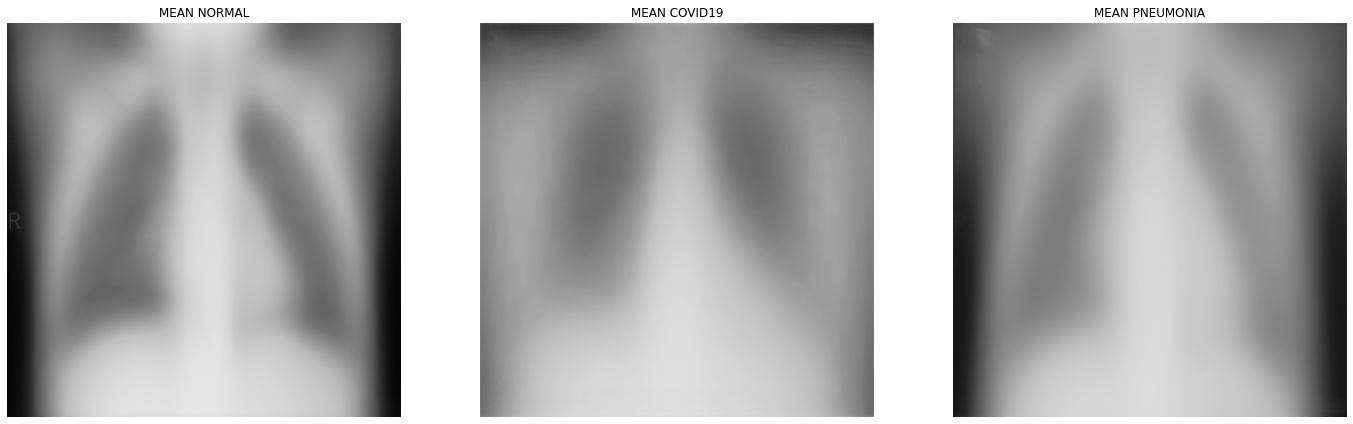

In [50]:
IMG_SIZE = 400

# calculate mean images
normal = glob.glob("../data/train/NORMAL/*")
covid = glob.glob("../data/train/COVID19/*")
pneumonia = glob.glob("../data/train/PNEUMONIA/*")

def mean_img(path, size):
    img_array = []
    for f_path in path:
        img = image.load_img(f_path, target_size=(size, size), color_mode='grayscale')
        img_array.append(image.img_to_array(img))
    img_array = np.array(img_array)
    mean = np.mean(img_array, axis=0)
    return mean

# plot these images
def plot_mean(paths, size, labels):
    fig = plt.figure(figsize=(24, 8))
    for i in range(len(labels)):
        ax = fig.add_subplot(1, 3, i+1)
        img = mean_img(paths[i], size)
        plt.imshow(img, vmin=0, vmax=255, cmap='Greys_r')
        plt.title("MEAN " + labels[i])
        plt.axis('off')

    # plt.savefig('../img/exp_mean.png', facecolor='w', bbox_inches='tight')
    plt.show()

plot_mean([normal, covid, pneumonia], IMG_SIZE, ['NORMAL', 'COVID19', 'PNEUMONIA'])


## 4. Contrast Between Mean Images

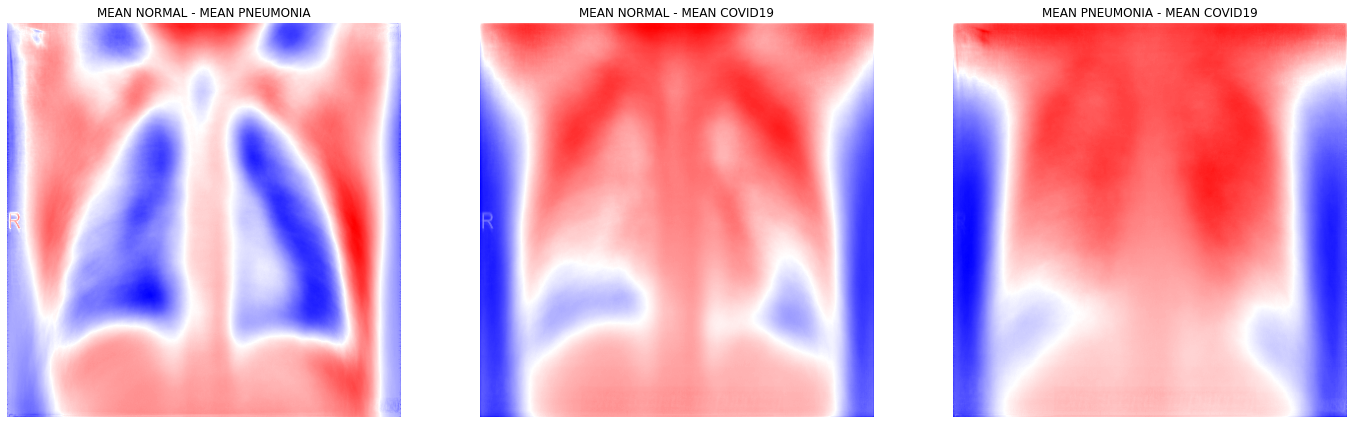

In [51]:
mean_normal = mean_img(normal, IMG_SIZE)
mean_covid = mean_img(covid, IMG_SIZE)
mean_pneumonia = mean_img(pneumonia, IMG_SIZE)

fig = plt.figure(figsize=(24, 8))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

ax = fig.add_subplot(1, 3, 1)
plt.imshow(mean_normal - mean_pneumonia, cmap='bwr')
plt.title(f'MEAN NORMAL - MEAN PNEUMONIA')
plt.axis('off')

ax = fig.add_subplot(1, 3, 2)
plt.imshow(mean_normal - mean_covid, cmap='bwr')
plt.title(f'MEAN NORMAL - MEAN COVID19')
plt.axis('off')

ax = fig.add_subplot(1, 3, 3)
plt.imshow(mean_pneumonia - mean_covid, cmap='bwr')
plt.title(f'MEAN PNEUMONIA - MEAN COVID19')
plt.axis('off')

plt.savefig('../img/exp_diff.png', facecolor='w', bbox_inches='tight')
plt.show()